In [1]:
import os
import tensorflow as tf
import keras
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt

In [2]:
train_path = "C:/Users/Pardis/Downloads/split_images_local/train"
valid_path = "C:/Users/Pardis/Downloads/split_images_local/val"
test_path = "C:/Users/Pardis/Downloads/split_images_local/test"

In [3]:
class_names = subdirs =['1','2', '3', '4','5','6','7','8','9','A','B','C','D','E','G','H','J','L','M','N','S','T','V','Y']
num_classes = len(class_names)

In [4]:
labels_nums = [i for i in range(0,len(class_names))]
print(labels_nums)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [6]:
train_imgs = []
train_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(train_path, subdir)
  for imgname in os.listdir(imgfolder):
    img = cv.imread(os.path.join(imgfolder, imgname), 0)
    img = cv.normalize(img, None, 0, 1.0,
    cv.NORM_MINMAX, dtype=cv.CV_32F)
    img=cv.resize(img,(28,28))
    train_imgs.append(img)
    train_labels.append(labels_nums[indx])

c = list(zip(train_imgs, train_labels))
random.shuffle(c)
train_imgs, train_labels = zip(*c)

train_images = np.array(train_imgs)
train_labels = np.array(train_labels)

In [7]:
valid_imgs = []
valid_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(valid_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      img = cv.normalize(img, None, 0, 1.0,
      cv.NORM_MINMAX, dtype=cv.CV_32F)
      img=cv.resize(img,(28,28))
      valid_imgs.append(img)
      valid_labels.append(labels_nums[indx])

c = list(zip(valid_imgs, valid_labels))
random.shuffle(c)
valid_imgs, valid_labels = zip(*c)

valid_imgs = np.array(valid_imgs)
valid_labels = np.array(valid_labels)

In [8]:
test_imgs = []
test_labels = []
for indx, subdir in enumerate(subdirs):
  imgfolder = os.path.join(test_path, subdir)
  if os.path.exists(imgfolder):
    for imgname in os.listdir(imgfolder):
      img = cv.imread(os.path.join(imgfolder, imgname), 0)
      img = cv.normalize(img, None, 0, 1.0,
      cv.NORM_MINMAX, dtype=cv.CV_32F)
      img=cv.resize(img,(28,28))
      test_imgs.append(img)
      test_labels.append(labels_nums[indx])

c = list(zip(test_imgs, test_labels))
random.shuffle(c)
test_imgs, test_labels = zip(*c)

test_imgs = np.array(test_imgs)
test_labels = np.array(test_labels)

8
7
1.0 0.0


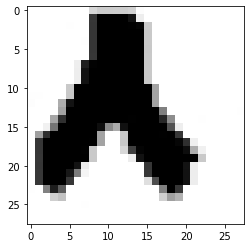

In [9]:
num=80
print(class_names[train_labels[num]])
print(train_labels[num])
print(np.max(train_images[num]),np.min(train_images[num]))
plt.imshow(train_images[num],cmap="gray")
plt.show()

In [10]:
test_labels.shape

(2033,)

In [11]:
test_imgs.shape

(2033, 28, 28)

In [2]:
from keras.models import Sequential
from keras import layers
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(24, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history= model.fit(train_images, train_labels,validation_data=(valid_imgs,valid_labels), epochs=20)


Epoch 1/20
502/502 [==============================] - 12s 11ms/step - loss: 0.1829 - accuracy: 0.9485 - val_loss: 0.0201 - val_accuracy: 0.9965
Epoch 2/20
502/502 [==============================] - 6s 11ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0064 - val_accuracy: 0.9985
Epoch 3/20
502/502 [==============================] - 4s 9ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0062 - val_accuracy: 0.9980
Epoch 4/20
502/502 [==============================] - 4s 8ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0010 - val_accuracy: 0.9995
Epoch 5/20
502/502 [==============================] - 4s 9ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0059 - val_accuracy: 0.9980
Epoch 6/20
502/502 [==============================] - 5s 9ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/20
502/502 [==============================] - 6s 11ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9990
Ep

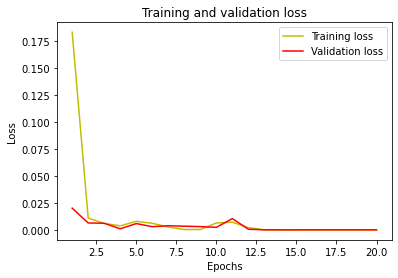

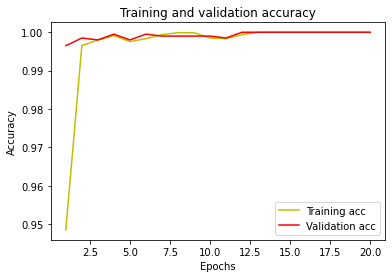

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
#val_acc = history.history['val_acc']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
model.save('saved_model/last_simple_ocr_plates_model.hdf5')